# Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import DiadFit as pf
pf.__version__


'1.0.5'

# Setup the folder access and paths

In [2]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# #Folder to save figures

figpath=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_UW'+slash+'Processing figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

# #Folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_UW'+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

# This compiles all the Raman data into one file, and exports

## First create the function

In [3]:

## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)

def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                print(file)
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

## Now run the function

In [4]:
UW = compile_Raman_sessions(path=MasterFolder+slash+"Data"+slash+"Data_Kea_Uwe_Litt"+slash+"Data_UW"+slash+"Raman",sheet_name='Sheet1',keyword='Raman_session')

Raman_session_December 12, 2022_fitted_2025-01-24.xlsx
Raman_session_November 3, 2022_fitted_2025-01-24.xlsx
Raman_session_December 13, 2022_fitted_2025-01-24.xlsx
Raman_session_November 8, 2022_fitted_2025-01-24.xlsx
Raman_session_November 11, 2022_fitted_2025-01-24.xlsx


# Now let's tidy , filter negative densities and test files if present, then export

In [5]:
# filter out bad ones. 
UW = UW[(~UW['filename'].str.contains('test|LL|L84'))&(UW['Density g/cm3']>0)]

UW['date_object']=pd.to_datetime(UW['date'])

UW=UW.sort_values(by=['date_object', 'filename'])

UW=UW.reset_index(drop=True)

# UW['filename_4merge'] = UW['filename'] + '_index' + UW.index.astype(str)

UW.to_clipboard(excel=True, index=False)

UW.to_excel(compilation_folder+'/'+"UW_Raman_allreps.xlsx")

UW


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values,lower_values,upper_values,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,date_object
0,UW7-OX1-mX1-FI#1,0.104006,0.004466,0.002333,0.003808,103.012737,0.005889,0.000614,0.005869,12.028,...,0.997901,0.997895,0.997907,1150.858408,70.370487,43.109258,Spline,0.045794,0.019402,2022-11-03
1,UW7-OX1-mX1-FI#2,0.129867,0.004581,0.002487,0.003847,103.078003,0.006278,0.000616,0.006261,12.021,...,0.997898,0.997892,0.997904,1150.833954,106.861788,75.285717,Spline,0.044751,0.018969,2022-11-03
2,UW7-OX1-mX2-FI#1,0.091930,0.004120,0.001590,0.003801,102.982260,0.004012,0.000618,0.003973,12.039,...,0.997895,0.997889,0.997901,1150.858408,189.930369,134.247921,Spline,0.093753,0.038931,2022-11-03
3,UW7-OX2-FI#1,0.136645,0.003938,0.000770,0.003862,103.095109,0.001945,0.000621,0.001847,6.031,...,0.997891,0.997885,0.997897,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-03
4,UW7-OX2-FI#2,0.144382,0.003958,0.000769,0.003883,103.114636,0.001941,0.000622,0.001842,6.018,...,0.997890,0.997884,0.997896,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,UW7-651-MI#1,0.115726,0.005712,0.004245,0.003821,103.042317,0.010714,0.001461,0.010641,12.038,...,0.997397,0.997383,0.997411,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13
86,UW7-659-FI#1,0.185895,0.009735,0.009443,0.002370,103.208723,0.023175,0.001489,0.023188,12.073,...,0.997377,0.997362,0.997391,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13
87,UW7-662-FI#1,0.121991,0.009112,0.008267,0.003831,103.058127,0.020864,0.001496,0.020865,12.122,...,0.997373,0.997359,0.997388,1150.687227,68.819112,39.991687,Spline,0.090984,0.037825,2022-12-13
88,UW7-662-FI#2,0.107391,0.007809,0.006816,0.003811,103.021281,0.017203,0.001501,0.017182,12.154,...,0.997371,0.997357,0.997386,1150.662773,110.166317,50.122234,Spline,0.251001,0.097840,2022-12-13


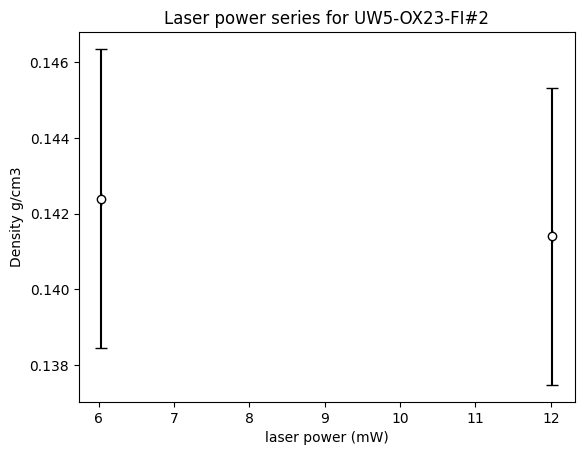

In [6]:
sub=UW[UW['filename'].str.contains('UW5-OX23-FI#2')]

plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
plt.xlabel('laser power (mW)')
plt.ylabel('Density g/cm3')
plt.title('Laser power series for UW5-OX23-FI#2')
plt.savefig(figpath+slash+"Laser power series for UW5-OX23-FI#2")

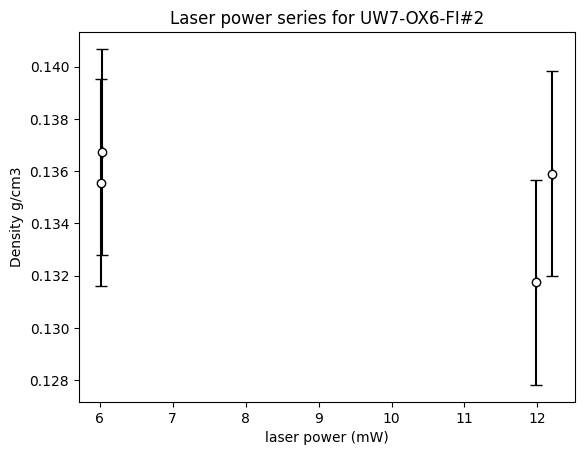

In [7]:
sub=UW[UW['filename'].str.contains('UW7-OX6-FI#2')]

plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
plt.xlabel('laser power (mW)')
plt.ylabel('Density g/cm3')
plt.title('Laser power series for UW7-OX6-FI#2')
plt.savefig(figpath+slash+"Laser power series for UW7-OX6-FI#2")

## Now we merge the names to match with probe AND filter shitty analyses (sigma>0.04 and very low power)

In [8]:
rep_FI_names=pd.read_excel('Helper files/'+'Helperfile_UW.xlsx',sheet_name='Sheet1')
UW_reps = pd.merge(UW, rep_FI_names, on=['filename', 'date_object','sec since midnight'])

#filter out really low power ones (<4mW) since uncertainty not good
UW_reps=UW_reps[(UW_reps['power (mW)']>3)&~(UW['σ Density g/cm3']>0.04)]
UW_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Region,FI#,Sample_crystal,Sample_crystal_region,FI_name,Name_on_EPMA,EBSD_simple_name,EBSD_grainID,EBSDname+grainID,EBSD_comment
0,UW7-OX1-mX1-FI#1,0.104006,0.004466,0.002333,0.003808,103.012737,0.005889,0.000614,0.005869,12.028,...,NaN,FI#1,UW7_OX1-mX1,UW7_OX1-mX1,UW7_OX1-mX1_FI#1,UW7-1_1,NaN,NaN,NaN,NaN
1,UW7-OX1-mX1-FI#2,0.129867,0.004581,0.002487,0.003847,103.078003,0.006278,0.000616,0.006261,12.021,...,NaN,FI#2,UW7_OX1-mX1,UW7_OX1-mX1,UW7_OX1-mX1_FI#2,UW7-1_2,NaN,NaN,NaN,NaN
2,UW7-OX1-mX2-FI#1,0.091930,0.004120,0.001590,0.003801,102.982260,0.004012,0.000618,0.003973,12.039,...,NaN,FI#1,UW7_OX1-mX2,UW7_OX1-mX2,UW7_OX1-mX2_FI#1,UW7-1_3,NaN,NaN,NaN,NaN
3,UW7-OX2-FI#1,0.136645,0.003938,0.000770,0.003862,103.095109,0.001945,0.000621,0.001847,6.031,...,NaN,FI#1,UW7_OX2,UW7_OX2,UW7_OX2_FI#1,UW7-2_1,NaN,NaN,NaN,NaN
4,UW7-OX2-FI#2,0.144382,0.003958,0.000769,0.003883,103.114636,0.001941,0.000622,0.001842,6.018,...,NaN,FI#2,UW7_OX2,UW7_OX2,UW7_OX2_FI#2,UW7-2_2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,UW7-651-MI#1,0.115726,0.005712,0.004245,0.003821,103.042317,0.010714,0.001461,0.010641,12.038,...,NaN,MI#1,UW7_651,UW7_651,UW7_651_MI#1,NaN,NaN,NaN,NaN,NaN
86,UW7-659-FI#1,0.185895,0.009735,0.009443,0.002370,103.208723,0.023175,0.001489,0.023188,12.073,...,NaN,FI#1,UW7_659,UW7_659,UW7_659_FI#1,NaN,NaN,NaN,NaN,NaN
87,UW7-662-FI#1,0.121991,0.009112,0.008267,0.003831,103.058127,0.020864,0.001496,0.020865,12.122,...,NaN,FI#1,UW7_662,UW7_662,UW7_662_FI#1,NaN,NaN,NaN,NaN,NaN
88,UW7-662-FI#2,0.107391,0.007809,0.006816,0.003811,103.021281,0.017203,0.001501,0.017182,12.154,...,NaN,FI#2,UW7_662,UW7_662,UW7_662_FI#2,NaN,NaN,NaN,NaN,NaN


## Now let's take mean of repeated analyses

In [9]:
grouped = UW_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = UW_reps.select_dtypes(include='number')
non_numeric_cols = UW_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_UW_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_UW_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_UW_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate UW_averageds and reindex columns to the original order
UW_averaged = pd.concat([numeric_UW_averaged_mean, non_numeric_UW_averaged], axis=1)
UW_averaged = UW_averaged.reindex(columns=UW_reps.columns)

# Add standard deviation columns after reindexing
UW_averaged = pd.concat([UW_averaged, numeric_UW_averaged_std.add_suffix('_Raman_STD')], axis=1)

# Reset index to get a DataFrame
UW_averaged = UW_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
UW_averaged = pd.merge(UW_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
UW_averaged['averaged?'] = UW_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
# UW_averaged=UW_averaged[~(UW_averaged['filename'].str.contains("186-9-118-A"))]
UW_averaged.to_excel(compilation_folder+'/'+"UW_Raman_averaged.xlsx")

UW_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_SO2_Raman_STD,Peak_Height_SO2_Raman_STD,SO2_Diad_Ratio_Raman_STD,SO2_mol_ratio_Raman_STD,Region_Raman_STD,EBSD_simple_name_Raman_STD,EBSD_grainID_Raman_STD,EBSDname+grainID_Raman_STD,EBSD_comment_Raman_STD,averaged?
0,FG04-FI1-6mW-R1,0.629273,0.002764,0.001411,0.002377,104.205267,0.002856,0.000631,0.002791,5.98150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,UW3-606-FI#1,0.132366,0.004561,0.002442,0.003852,103.084311,0.006163,0.001417,0.006013,12.05100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,UW3-606-MI#1,0.131510,0.003964,0.000942,0.003850,103.082151,0.002378,0.001425,0.001909,12.10400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,UW3-618-FI#1,0.101018,0.004512,0.002423,0.003806,103.005197,0.006115,0.001432,0.005960,12.01400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,UW3-692-FI#1,0.154607,0.007264,0.006118,0.003915,103.140441,0.015441,0.000616,0.015464,12.01000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,UW7-OX6-FI#2-12mW-R1,0.134985,0.003937,0.000779,0.003858,103.090919,0.001967,0.000614,0.001871,9.06175,...,20.555079,17.800865,0.000175,0.000075,NaN,NaN,NaN,NaN,NaN,Yes
73,UW7-OX7-FI#1,0.171994,0.003587,0.002689,0.002373,103.174533,0.006629,0.000615,0.006614,12.00500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
74,UW7-OX8-FI#1,0.120475,0.003967,0.001040,0.003829,103.054301,0.002625,0.000615,0.002557,12.01200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
75,UW7-OX8-FI#2,0.126914,0.004174,0.001635,0.003840,103.070551,0.004127,0.000616,0.004090,12.02500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
